# Microsoft App Store Analysis
This notebook analyzes the [Windows Store dataset](https://www.kaggle.com/vishnuvarthanrao/windows-store) by Vishnu Varthan Rao from Kaggle. This dataset consists of six features: app rating, number of people rated, category, date and price. We will perform some exploratory data analysis & visualization, then train a linear regression model to predict app price.

    Analysis by Wesley Laurence

In [1]:
# import libraries
import pandas as pd
import numpy as np

In [2]:
# load dataset into dataframe
df = pd.read_csv('msft.csv')

In [3]:
# view first five rows
df.head()

,Name,Rating,No of people Rated,Category,Date,Price
0,Dynamic Reader,3.5,268,Books,07-01-2014,Free
1,"Chemistry, Organic Chemistry and Biochemistry-...",3.0,627,Books,08-01-2014,Free
2,BookViewer,3.5,593,Books,29-02-2016,Free
3,Brick Instructions,3.5,684,Books,30-01-2018,Free
4,Introduction to Python Programming by GoLearni...,2.0,634,Books,30-01-2018,Free


In [4]:
# dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5322 entries, 0 to 5321
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                5321 non-null   object 
 1   Rating              5321 non-null   float64
 2   No of people Rated  5322 non-null   int64  
 3   Category            5321 non-null   object 
 4   Date                5321 non-null   object 
 5   Price               5321 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 249.6+ KB


### Data Preparation

In [5]:
# check if there are any missing values
df.isnull().values.any()

True

In [6]:
# drop row with missing values
df.dropna(inplace=True)

<b>Convert the price column from string values to float values. Price is measured in the Indian rupee (₹).</b>

In [7]:
# convert price strings into float values
all_prices = list(df['Price'])
new_price_column = []

# iterate through each value in column
for price in all_prices:
    
    if 'Free' in price:
        new_price_column.append(float(0))
        
    elif '₹' in price:
        
        # remove ₹ currency symbol
        price = price[2:]
        
        # remove ',' characters
        if ',' in price:
            price_elements = price.split(',')
            
            price = price_elements[0] + price_elements[1]
            
        new_price_column.append(float(price))

# update column in dataframe        
df['Price'] = new_price_column

<b>Convert date strings to pandas date objects and parse year, month and day into seperate columns.</b>

In [8]:
# containers for data
date_objects = []
years = []
months = []
days = []

# iterate through each row in dataframe
for string_data in df['Date']:
    date_object = pd.to_datetime(string_data).date()
    date_objects.append(date_object)
    years.append(date_object.year)
    months.append(date_object.month)
    days.append(date_object.day)
    
# add new columns to dataframe
df['Date'] = date_objects
df['Year'] = years
df['Month'] = months
df['Day'] = days

# Exploratory Data Analysis

In [9]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# set seaborn style
sns.set(style="whitegrid")

In [11]:
# statistical analysis
df.describe()

,Rating,No of people Rated,Price,Year,Month,Day
count,5321.000000,5321.000000,5321.000000,5321.000000,5321.000000,5321.000000
mean,3.792708,551.798722,11.012253,2015.942868,6.380568,16.051682
std,0.991681,259.787733,117.202914,2.168149,3.468233,9.016451
min,1.000000,100.000000,0.000000,2010.000000,1.000000,1.000000
25%,3.500000,327.000000,0.000000,2014.000000,3.000000,8.000000
50%,4.000000,548.000000,0.000000,2016.000000,6.000000,16.000000
75%,4.500000,779.000000,0.000000,2018.000000,9.000000,24.000000
max,5.000000,1000.000000,5449.000000,2020.000000,12.000000,31.000000


### Category Analysis
Music is the most popular app category on the Windows app store.

In [12]:
# category value counts
category_value_counts = df['Category'].value_counts()
category_value_counts.head(5)

Music                 753
Books                 707
Business              679
Health and Fitness    527
Developer Tools       500
Name: Category, dtype: int64

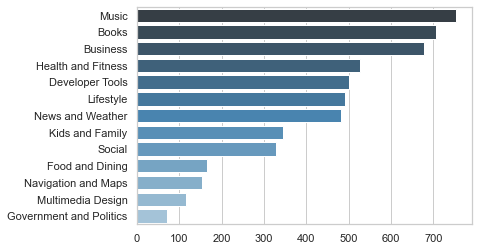

In [13]:
# barplot for category value counts
ax = sns.barplot(x=list(category_value_counts),
                 y=category_value_counts.index,
                 palette="Blues_d")

### Rating Analysis
The rating distribution is slightly skewed left with a mean of 3.8.

In [14]:
df['Rating'].describe()

count    5321.000000
mean        3.792708
std         0.991681
min         1.000000
25%         3.500000
50%         4.000000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

<AxesSubplot:xlabel='Rating'>

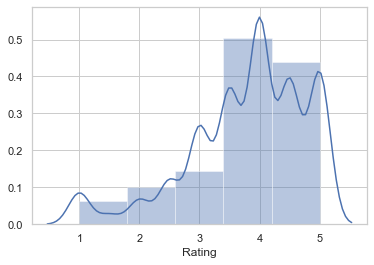

In [15]:
sns.distplot(df['Rating'],bins=5)

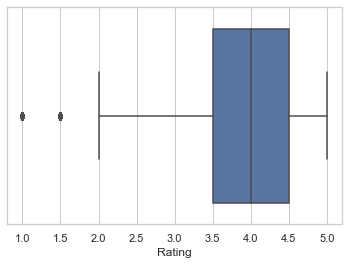

In [16]:
ax = sns.boxplot(x=df["Rating"])

### Number of Ratings Analysis
The distribution of number of ratings per apps is roughly uniform with a mean of 551 ratings

In [17]:
df['No of people Rated'].describe()

count    5321.000000
mean      551.798722
std       259.787733
min       100.000000
25%       327.000000
50%       548.000000
75%       779.000000
max      1000.000000
Name: No of people Rated, dtype: float64

<AxesSubplot:xlabel='No of people Rated'>

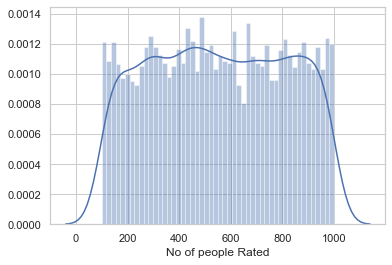

In [18]:
sns.distplot(df['No of people Rated'],bins=50)

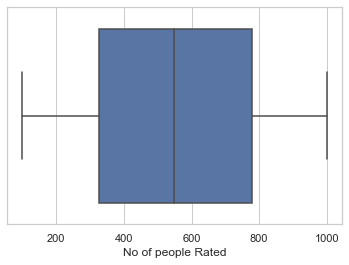

In [19]:
ax = sns.boxplot(x=df["No of people Rated"])

### Price Analysis
The price values are heavily skewed right and 97% of the apps are free to download.

<AxesSubplot:xlabel='Price'>

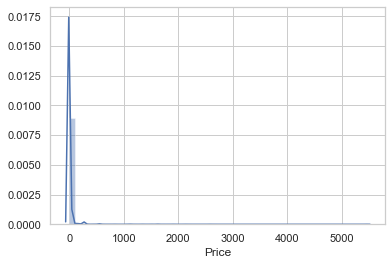

In [20]:
# distribution with outlier
sns.distplot(df['Price'],bins=50)

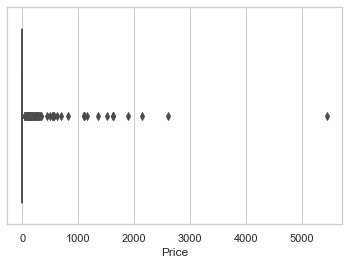

In [21]:
ax = sns.boxplot(x=df["Price"])

In [22]:
# percentage of apps that are free
total_free = len(df[df['Price']==0])
total_rows = len(df['Price'])
percent_free = round((total_free / total_rows)*100)
print(str(percent_free)+'% of apps are free to download')

97% of apps are free to download


### Date Analysis

<AxesSubplot:xlabel='Year'>

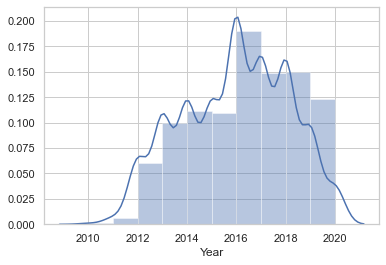

In [23]:
# distribution of apps per year
sns.distplot(df['Year'],bins=10)

<AxesSubplot:xlabel='Month'>

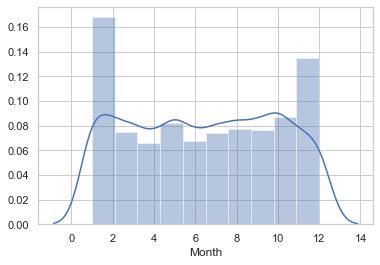

In [24]:
# distribution of apps by months
sns.distplot(df['Month'],bins=10)

### Multivariate Analysis

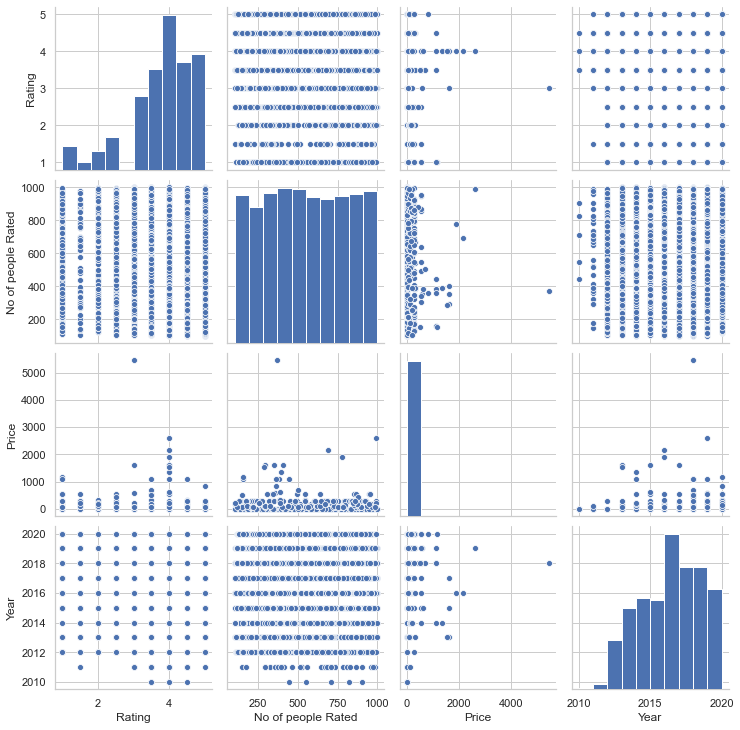

In [25]:
sns.pairplot(df[['Rating','No of people Rated','Price','Year']])

<AxesSubplot:>

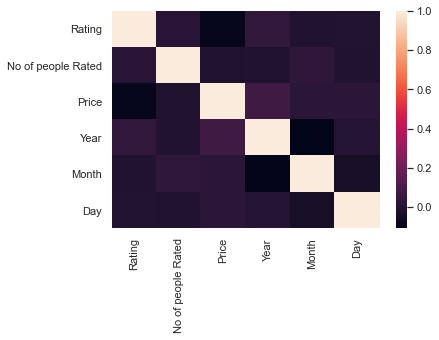

In [26]:
# heatmap of correlations
sns.heatmap(df.corr())

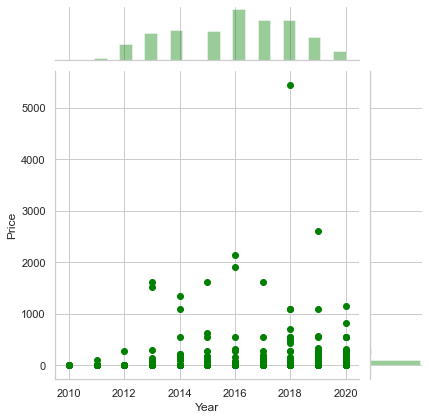

In [27]:
# app prices by year
sns.set(style="whitegrid")
sns.jointplot(x='Year',y='Price',data=df,color='green')

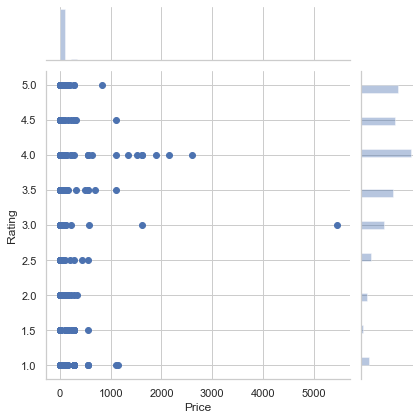

In [28]:
# price distribution by rating
sns.jointplot(x='Price',y='Rating',data=df)

# Linear Regression Model

### Label encoding

Before we train our model, lets encode the string values in the Category column as integer values.

In [29]:
from sklearn import preprocessing

In [30]:
# create label encoder object
le = preprocessing.LabelEncoder()

In [31]:
string_category_column = df['Category']

In [32]:
# fit to category column data
le.fit(string_category_column)

LabelEncoder()

In [33]:
list(le.classes_)

['Books',
 'Business',
 'Developer Tools',
 'Food and Dining',
 'Government and Politics',
 'Health and Fitness',
 'Kids and Family',
 'Lifestyle',
 'Multimedia Design',
 'Music',
 'Navigation and Maps',
 'News and Weather',
 'Social']

In [34]:
encoded_category_column = le.transform(string_category_column)

In [35]:
df['Category'] = encoded_category_column

### Standard Scaling

In [36]:
features = df[['Rating','No of people Rated','Category']]

In [37]:
# import standard scaler
from sklearn.preprocessing import StandardScaler

In [38]:
# create StandardScaler object
scaler = StandardScaler()

In [39]:
# fit scaler to features
scaler.fit(features)

StandardScaler()

In [40]:
# use the .transform method to transform features
scaled_features = scaler.fit_transform(features)

In [41]:
# create new scaled dataframe
df_feat = pd.DataFrame(scaled_features,columns=features.columns)

### Train Test Split

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X = df_feat
y = df['Price']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Linear Regression
Given the rating, category and number of ratings, predict app price. 

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lm = LinearRegression()

In [47]:
lm.fit(X_train,y_train)

LinearRegression()

### Predictions and Evaluation

In [48]:
predictions = lm.predict(X_test)

In [49]:
from sklearn import metrics

In [50]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 22.934647805887344
MSE: 8739.135380622783
RMSE: 93.48334279764916
